# Dijkstra's Algorithm
## MSDS-432 - Kiley - Week 7 Assignment
### Assignment Overview
The mini-programming assignment requires us to implement and test the performance of dijkstra's algorithm compared to breadth-first algorithm from *Grokking Algorithms*.

This assignment requires us to calculate the shortest route from NYC to LA using the relationships defined in the exhibit provided.

We are to test dijkstra's algorithm, which will consider the weights (times) of the edges of of the connected nodes (to travel between cities) and the breadth first algorth which will simply find the fewest nodes as it works through its queue, not considering weighting.   

The output and the time required to search to be captured, reported, and analyzed.

<hr>

**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.

Found a wonderful reference site called http://bigocheatsheet.com/.

This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Generate And Test Data 
The assignment has provided a graph of nodes and edges.  The following section splits those nodes and edges into dictionaries so that they can be used with both the graphing package networkx; as well as the algorithms. 

This format of defining the dictionaries is borrowd from *Grokking Algorithms*

In [2]:
# Initialize empty dictionary
graph = {}

# Graph all relationships & the weights for the city and the connected nodes to the city
graph['NYC'] = {}
graph['NYC']['Indianapolis']= 11
graph['NYC']['Pittsburg']=7
graph['NYC']['DC']=2

graph['DC'] = {}
graph['DC']['Atlanta']= 2

graph['Indianapolis'] = {}
graph['Indianapolis']['Kansas City']= 8

graph['Pittsburg'] = {}
graph['Pittsburg']['Cincinnati']= 6

graph['Atlanta'] = {}
graph['Atlanta']['New Orleans']= 2
    
graph['Kansas City'] = {}
graph['Kansas City']['Denver']= 7   
    
graph['Cincinnati'] = {}
graph['Cincinnati']['St Louis']= 8       
    
graph['New Orleans'] = {}
graph['New Orleans']['Dallas']= 2        

graph['Denver'] = {}
graph['Denver']['SLC']= 6 

graph['St Louis'] = {}
graph['St Louis']['OKC']= 7
        
graph['OKC'] = {}
graph['OKC']['Albuquerque']= 9
    
graph['Dallas'] = {}
graph['Dallas']['Albuquerque']= 2    
    
graph['SLC'] = {}
graph['SLC']['Las Vegas']= 9   
    
graph['Albuquerque'] = {}
graph['Albuquerque']['Phoenix']= 2    

graph['Phoenix'] = {}
graph['Phoenix']['San Diego']= 5
graph['Phoenix']['Las Vegas']= 2 
    
graph['Las Vegas'] = {}
graph['Las Vegas']['San Diego']= 2
graph['Las Vegas']['Los Angeles']= 5 
    
graph['San Diego'] = {}
graph['San Diego']['Los Angeles']= 2

# LA does not have any downstream nodes; this requires an empty item in the dictionary
graph['Los Angeles'] = {}

print(graph)

{'NYC': {'Indianapolis': 11, 'Pittsburg': 7, 'DC': 2}, 'DC': {'Atlanta': 2}, 'Indianapolis': {'Kansas City': 8}, 'Pittsburg': {'Cincinnati': 6}, 'Atlanta': {'New Orleans': 2}, 'Kansas City': {'Denver': 7}, 'Cincinnati': {'St Louis': 8}, 'New Orleans': {'Dallas': 2}, 'Denver': {'SLC': 6}, 'St Louis': {'OKC': 7}, 'OKC': {'Albuquerque': 9}, 'Dallas': {'Albuquerque': 2}, 'SLC': {'Las Vegas': 9}, 'Albuquerque': {'Phoenix': 2}, 'Phoenix': {'San Diego': 5, 'Las Vegas': 2}, 'Las Vegas': {'San Diego': 2, 'Los Angeles': 5}, 'San Diego': {'Los Angeles': 2}, 'Los Angeles': {}}


## Set up the Cost Table
Proper implementation of the dijkstra alorithm requires a table of the costs associated with moving between nodes.
To begin, only the nodes directly connected to the initialization node, in this case NYC, can be populated with the true weight.

Setting all none initializing nodes to infinity allows the algorithm to accept that they cannot be the shortest route ever.

In [3]:
infin = float("inf")
costs = {}

costs['DC']=2
costs['Indianapolis']=11
costs['Pittsburg']=7
costs['Atlanta']=infin
costs['Kansas City']=infin
costs['Cincinnati']=infin
costs['New Orleans']=infin
costs['Denver']=infin
costs['St Louis']=infin
costs['OKC']=infin
costs['Dallas']=infin
costs['SLC']=infin
costs['Albuquerque']=infin
costs['Phoenix']=infin
costs['Las Vegas']=infin
costs['San Diego']=infin
costs['Los Angeles']=infin

print(costs)

{'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7, 'Atlanta': inf, 'Kansas City': inf, 'Cincinnati': inf, 'New Orleans': inf, 'Denver': inf, 'St Louis': inf, 'OKC': inf, 'Dallas': inf, 'SLC': inf, 'Albuquerque': inf, 'Phoenix': inf, 'Las Vegas': inf, 'San Diego': inf, 'Los Angeles': inf}


## Set up the parents table
This table is what the algorithm references to ensure that the proper sequencing is maintained

In [4]:
parents = {}

parents['DC'] = ['NYC']
parents['Indianapolis'] = ['NYC']
parents['Pittsburg'] = ['NYC']
parents['Atlanta'] = ['DC']
parents['Kansas City'] = ['Indianapolis']   
parents['Cincinnati'] = ['Pittsburg']
parents['New Orleans'] = ['Atlanta']
parents['Denver'] = ['Kansas City'] 
parents['St Louis'] = ['Cincinnati']
parents['OKC'] = ['St Louis']
parents['Dallas'] = ['New Orleans']
parents['SLC'] = ['Denver']
parents['Albuquerque'] = ['OKC', 'Dallas']
parents['Phoenix'] = ['Albuquerque'] 
parents['Las Vegas'] = ['SLC', 'Phoenix'] 
parents['San Diego'] = ['Las Vegas', 'Phoenix'] 
parents['Los Angeles'] = None

print(parents)

{'DC': ['NYC'], 'Indianapolis': ['NYC'], 'Pittsburg': ['NYC'], 'Atlanta': ['DC'], 'Kansas City': ['Indianapolis'], 'Cincinnati': ['Pittsburg'], 'New Orleans': ['Atlanta'], 'Denver': ['Kansas City'], 'St Louis': ['Cincinnati'], 'OKC': ['St Louis'], 'Dallas': ['New Orleans'], 'SLC': ['Denver'], 'Albuquerque': ['OKC', 'Dallas'], 'Phoenix': ['Albuquerque'], 'Las Vegas': ['SLC', 'Phoenix'], 'San Diego': ['Las Vegas', 'Phoenix'], 'Los Angeles': None}


## Draw the graph
Use networkx to draw the graph.
Note, adding the weights to the edges has been a total chore.

Future enchancment is to figure out how to do that.

<Figure size 864x864 with 0 Axes>

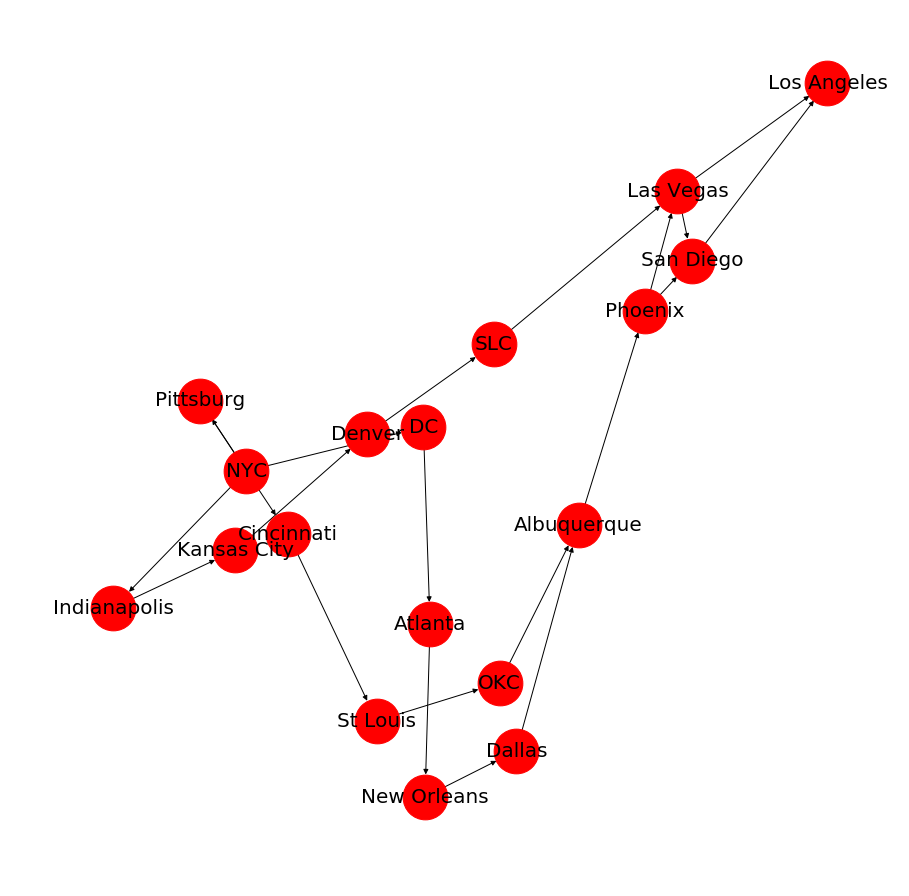

In [5]:
# Initialize Graph
G = nx.DiGraph(graph)

# Plot is too tiny without setting explicit parameters
plt.figure(3,figsize=(12,12)) 

# Draw graph
nx.draw(G,with_labels = True,
        node_size=2000, font_size=20)

# Save a copy of the figure to view larger in another tool
plt.savefig("travel1.png")

# Select the Search Algorithm

**dijkstra's algorithm** is a graphing algorithm that searches for the shortest distance (considering weighting of the edges) between two nodes in a graph model.  The application is based on code that was sourced from *Grokking Algorithms*.  Dijkdtra'd algorithm operates in O(|V|^2) time where V is verticies and E is edges.  

Dijkstra's algorithm works by selecting the node that is closest to the start, it updates the costs for its neighbors, it then updates the parents cost based on the neighbors costs being updated, and then marks it as processed.

Note: a list of all checked items is required to prevent relationships that have the ability to be reversed from causing an infinite loop.

Adapted from https://github.com/egonSchiele/grokking_algorithms/blob/master/07_dijkstras_algorithm/python/01_dijkstras_algorithm.py

In [6]:
processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

print("Cost from the start to each node:")
print(costs)

Cost from the start to each node:
{'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7, 'Atlanta': 4, 'Kansas City': 19, 'Cincinnati': 13, 'New Orleans': 6, 'Denver': 26, 'St Louis': 21, 'OKC': 28, 'Dallas': 8, 'SLC': 32, 'Albuquerque': 10, 'Phoenix': 12, 'Las Vegas': 14, 'San Diego': 16, 'Los Angeles': 18}


The quickest route from NYC to LA takes 18 units (hours?) drive.
The path is:

**NYC -> DC -> Atlanta -> New Orleans -> Dallas -> Albuquerque -> Phoenix -> Las Vegas -> San Diego -> Los Angeles.**

There are 9 hops to get to LA in this algorithm.
The edges from each node cost two hours for a total of 18.

**Breadth-first search** is a graphing algorithm that searches for the shortest distance (hops/unweighted path) between two nodes in a graph model.  The application is based on code that was sourced from *Grokking Algorithms*.  Breadth-first search operates in O(V+E) time wherev is verticies and E is edges.  

The breadth-first search operates by checking first each node in the first degree relationship, if there is not match in that degree, it then enqueues the nodes second degree relationship and so on, until the relationships and queue has been exhasuted.   

Note: a list of all checked items is required to prevent relationships that have the ability to be reversed from causing an infinite loop.

Adapted from: https://github.com/egonSchiele/grokking_algorithms/blob/master/06_breadth-first_search/python/01_breadth-first_search.py

In [7]:
def search(name):
    search_queue = deque()
    search_queue += graph["NYC"]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == name:
                
                return (True, searched)
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return (False, searched)

In [8]:
search('Los Angeles')

(True,
 ['Indianapolis',
  'Pittsburg',
  'DC',
  'Kansas City',
  'Cincinnati',
  'Atlanta',
  'Denver',
  'St Louis',
  'New Orleans',
  'SLC',
  'OKC',
  'Dallas',
  'Las Vegas',
  'Albuquerque',
  'San Diego'])

As expected, the algorithm got us here in fewer hops, but since it does not consider the weights, the total time will be much higher.

**NYC -> Indianapolis -> Kansas City -> Denver -> SLC -> Las Vegas -> Los Angeles** 

The algorithm made only 6 hops to get to LA.

In [9]:
# Weights of each node 
print('Total time in on path is:', 0 + 11 + 8 + 7 + 6 + 9 + 5)

Total time in on path is: 46


*Algorithms both worked as expected*

# Run Trials 
Run trials and store the requested data for further analysis.

In [10]:
#Assignment requirements ask for several values from each degree

# Initialize empty lists
fun_timer=list([])
fun_degree=list([])
fun_value=list([])

#======================================================================
# Breadth First Algorithm
#======================================================================

start = time.clock() # Timestamp start
search('Los Angeles')
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds
fun_degree.append('Breadth First')

#======================================================================
# Dijkstra's Algorithm
#======================================================================

start = time.clock() # Timestamp start
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds
fun_degree.append('Dijkstra')


(True,
 ['Indianapolis',
  'Pittsburg',
  'DC',
  'Kansas City',
  'Cincinnati',
  'Atlanta',
  'Denver',
  'St Louis',
  'New Orleans',
  'SLC',
  'OKC',
  'Dallas',
  'Las Vegas',
  'Albuquerque',
  'San Diego'])

# Create Pandas Data Frame 
Pass the output data from the arrays and summarize in a pandas data frame for further analysis. 

In [11]:
# Store the performance outputs for analysis
df = pd.DataFrame({'degree': fun_degree,
                   'timer': fun_timer
                    })

# View the output dataframe
df

,degree,timer
0,Breadth First,2.129451
1,Dijkstra,0.195879


# Visualize Results

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x128159d9630>,
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Milliseconds')

Text(0.5, 1.0, 'Time to search')

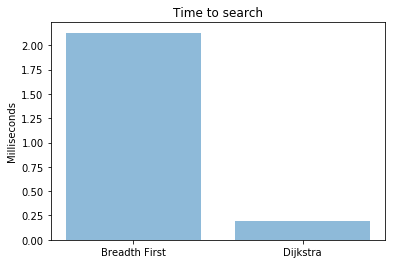

In [12]:
objects = df['degree']
y_pos = np.arange(len(objects))
performance = df['timer']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Milliseconds')
plt.title('Time to search')
 
plt.show()

The graphics above are what was created for all tests performed as part of this assigment.  
The algorithm operates extremely quickly and hardly takes any time to run.

**Breadth first took significantly more time to run than Dijkstra**

Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  This exercise helps to reinforce the value of measuring and testing algorithms as they scale.